# **Polynomial Regression**
-- In polynomial regression the relationship between the independent variable x and the dependent variable y is modelled as an n-th degree polynomial in x. It fits a nonlinear relationship between the value of x and y

-- Here we will predict the salary based on year of experience

-- Use the link for data: https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv'

In [ ]:
#install dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import the data set
data=pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')

In [ ]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#install panda sql
!pip install pandasql

In [ ]:
#Panda sql (not running)
#from sqlalchemy import create_engine
#engine=create_engine('sqlite:///:memory:')
#pd.read_sql('SELECT * FROM data;',engine)

In [ ]:
import pandasql
sub_data=pandasql.sqldf('SELECT * from data where Salary > 80000;',globals())
print(sub_data)

          Position  Level   Salary
0  Country Manager      5   110000
1   Region Manager      6   150000
2          Partner      7   200000
3   Senior Partner      8   300000
4          C-level      9   500000
5              CEO     10  1000000


In [ ]:
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
data.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [ ]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

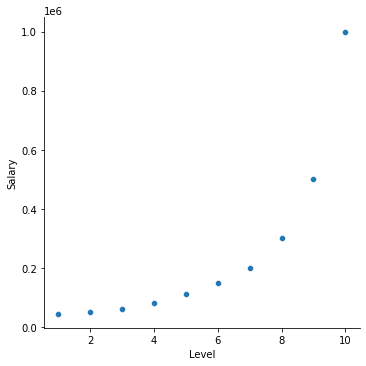

In [ ]:
sns.relplot(x='Level',y='Salary',data=data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### [Difference between loc and iloc](https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79)

In [ ]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(8, 1)
(2, 1)


In [ ]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(X_train,y_train)

0.624399196310701

In [ ]:
reg.predict(X_test)

array([ 47303.03030303, 532575.75757576])

In [ ]:
reg.score(X_test,y_test)

0.9873719729223112

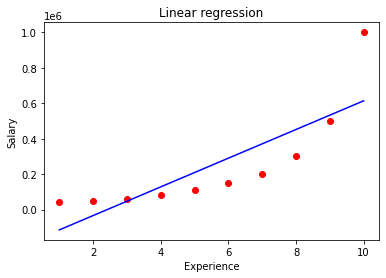

In [ ]:
def Visulized():
  plt.scatter(X,y,color='red')
  plt.plot(X,reg.predict(X), color='blue')
  plt.title('Linear regression')
  plt.xlabel('Experience')
  plt.ylabel('Salary')
  plt.show()
  return
Visulized()

**New code:**

-- from sklearn.preprocessing import PolynomialFeatures

-- p_reg=PolynomialFeatures(degree=4)

-- X_p=p_reg.fit_transform(X)




In [ ]:
from sklearn.preprocessing import PolynomialFeatures
p_reg=PolynomialFeatures(degree=4)
X_p=p_reg.fit_transform(X)
reg=LinearRegression()
reg.fit(X_p,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(X_p,y)

0.9973922891706614

In [ ]:
X_t=p_reg.fit_transform(X_test)
reg.predict(X_t)

array([ 58642.1911421 , 528694.63869462])

In [ ]:
reg.score(X_t,y_test)

0.9914749386910179

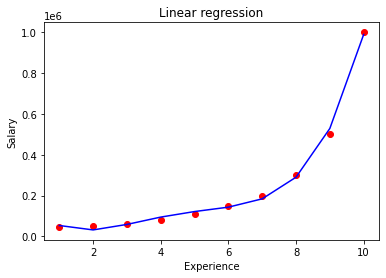

In [ ]:
def Visulized():
  plt.scatter(X,y,color='red')
  plt.plot(X,reg.predict(X_p), color='blue')
  plt.title('Linear regression')
  plt.xlabel('Experience')
  plt.ylabel('Salary')
  plt.show()
  return
Visulized()

**Source Links:**
>-- Summary of all regressions: https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec

>-- Polynomial regression: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386